# Diffusion Model (BPS 1987)

In [4]:
import numpy as np
from numpy import random
import math
import matplotlib.pyplot as plt
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from numpy.random import randn
from scipy.optimize import curve_fit


In [5]:
def update_market(N, buyers, sellers, price, price_max, buyer_pos, seller_pos, transaction_found):
    # N is the number of noise traders in the market
    # price_max is the price upper bound
    #seller_pos (buyer_pos) gives the position of the seller (buyer) who participates in a transaction

    
    # This functions allows to update the bids and asks at a time step.
    # Return: the updated buyers prices and sellers prices
    
    for b in range (int(N/2)):
        if buyers[b] == 0:
            buyers[b] = random.randint(0,2,1)[0]
        elif buyers[b] == price_max:
            buyers[b] = price_max - random.randint(0,2,1)[0]
        else:
            buyers[b] = buyers[b] + 2*random.randint(0,2,1)[0] - 1
    for s in range (int(N/2)):
        if sellers[s] == 0:
            sellers[s] = random.randint(0,2,1)[0]
        elif sellers[s] == price_max:
            sellers[s] = price_max - random.randint(0,2,1)[0]
        else:
            sellers[s] = sellers[s] + 2*random.randint(0,2,1)[0] - 1
 
    if transaction_found:
        buyers[buyer_pos] = random.randint(0, price + 1, 1)[0]
        sellers[seller_pos] = random.randint(price, price_max + 1, 1)[0]
        
    return(buyers, sellers)

In [6]:
def diffusion_Model(N, price_max, T):
    
    # This function initializes and implements the diffusion Model with N noise agents and a price_max for T time steps
    # Returns: the prices at each time step and the final distribution of prices
    # If there is no transaction at time t, the price at t is -1
    
    
    # N is the number of noise traders in the market
    # price_max is the price upper bound
    # T is the max time step
    
    # buyers (sellers) list contains the prices offered by the buyers(sellers) at one time step
    buyers = []
    sellers = []
    
    # prices[t] is the price at which a transaction occurred at time t
    prices = []
    
    # N has to be an even number to have the same number of buyers and sellers
    if N//2 == 1:
        N = N + 1
           
    #Initialization of the market
    buyers = random.randint(0 , price_max/2 , int(N/2) )
    sellers = random.randint(price_max/2 , price_max + 1 , int(N/2) )
    agents = np.concatenate((buyers, sellers))
    
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5) 
    plt.hist(agents, bins = 500)
    plt.title("Initial price distribution for the diffusion model, N=%i et T=%i" %(N,T))
    plt.ylabel('Number of agents')
    plt.xlabel('Price')
    plt.show()
    transactions = []
    # price give the transaction price (if a transaction happens).
    # If there is no transaction at t, we keep the price of t-1
    price = int(price_max/2)
    for t in range (T):
        
        #seller_pos (buyer_pos) gives the position of the seller (buyer) who participates in a transaction
        seller_pos = -1
        buyer_pos = -1
        
        #select a random seller or buyer
        selected = random.randint(0, N, 1)[0]
        transaction_found = False
        if selected < int(N/2): #we have selected a buyer
            for s in range(int(N/2)):
                if sellers[s] == buyers[selected] and transaction_found == False:
                    buyer_pos = selected
                    seller_pos = s
                    price = buyers[selected]    
                    transaction_found = True
                    
        else: #we have selected a seller

            for b in range(int(N/2)):
                if buyers[b] == sellers[selected - int(N/2)] and transaction_found == False:
                    buyer_pos = b
                    seller_pos = selected - int(N/2)
                    price = buyers[b]
                    transaction_found = True

        
        prices.append(price)
        if transaction_found:
            transactions.append(price)
        buyers, sellers = update_market(N, buyers, sellers, price, price_max, buyer_pos, seller_pos, transaction_found)
    
    return(prices, np.concatenate((buyers, sellers)), transactions)

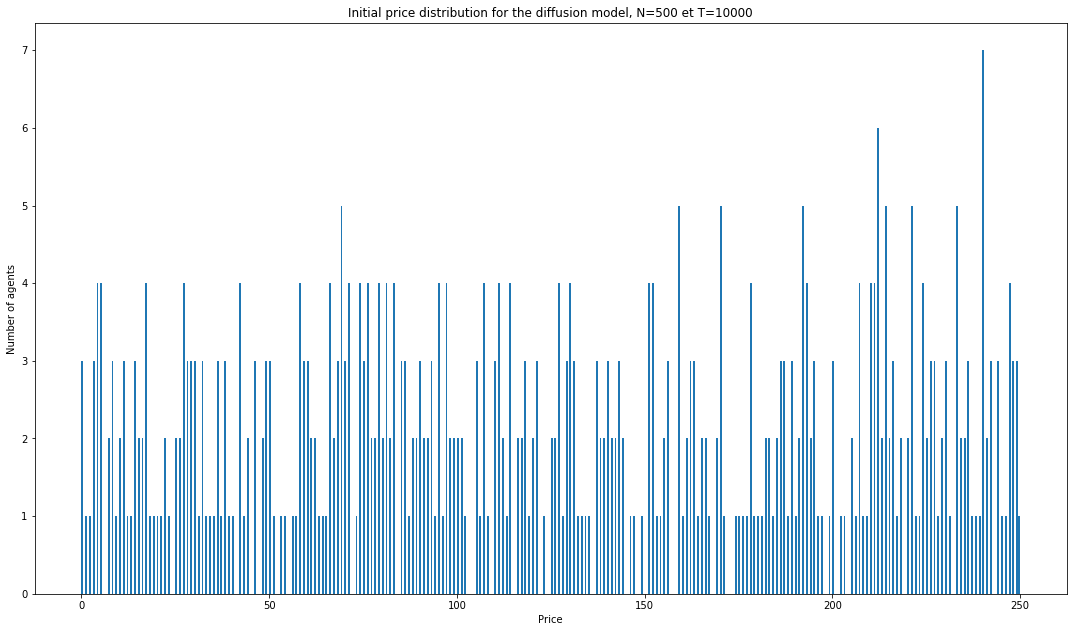

In [7]:
# Defining the model parameters
N = 500
price_max = 250
T = 10000
# Running the simulation
prices, agents, transactions= diffusion_Model(N, price_max, T)

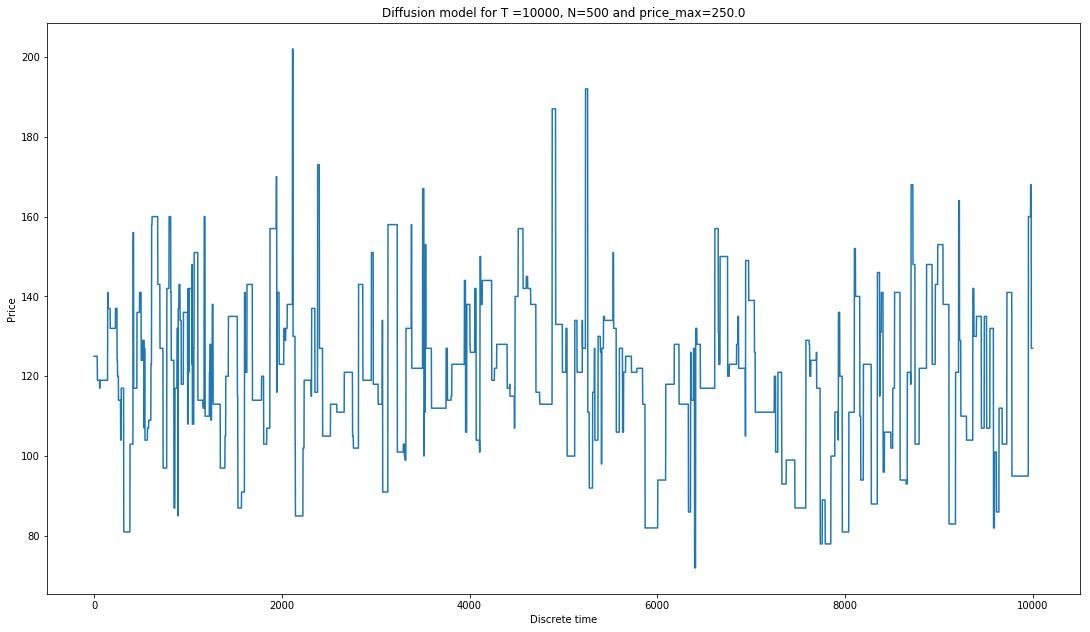

In [8]:
# Plot the Prices evolution with time
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5) 
plt.plot(range(T),prices)
plt.title("Diffusion model for T =%i, N=%i and price_max=%.1f" %(T,N, price_max))
plt.ylabel('Price')
plt.xlabel('Discrete time')
plt.show()

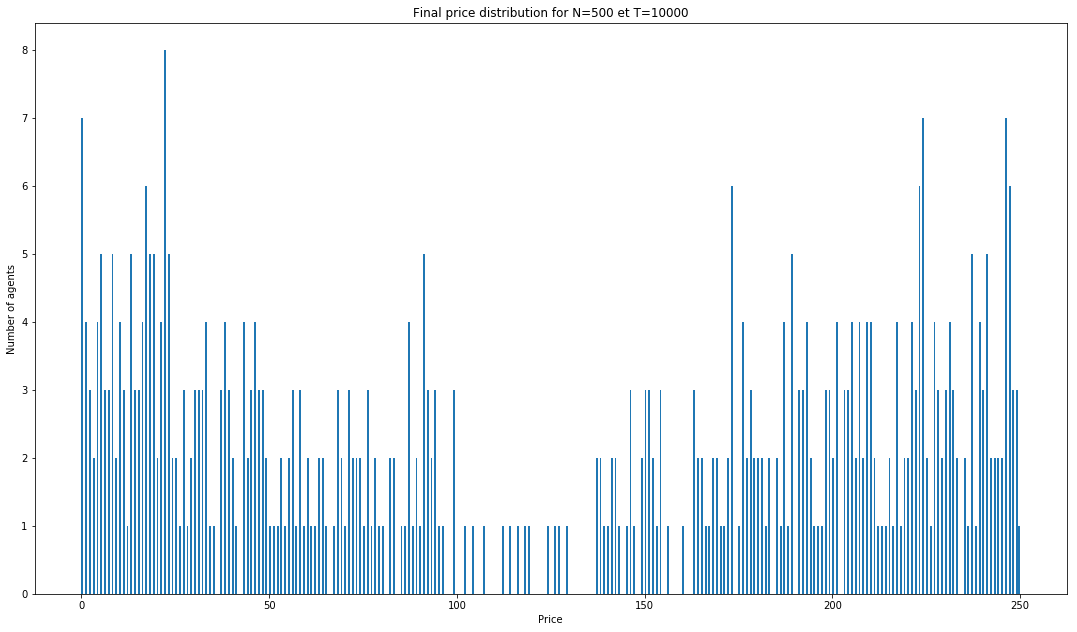

In [9]:
# Plot the prices distribution between agents in the final configuration at T
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5) 
plt.hist(agents, bins = 500)
plt.title("Final price distribution for N=%i et T=%i" %(N,T))
plt.ylabel('Number of agents')
plt.xlabel('Price')
plt.show()

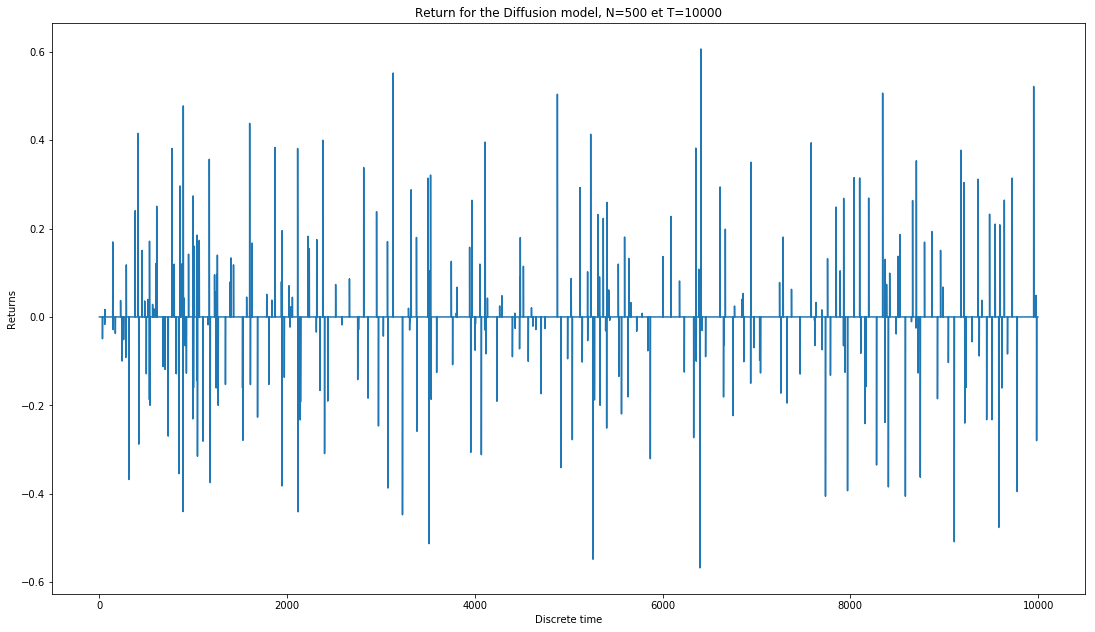

In [10]:
# Plot the price variation at each time interval = 1

def price_variation(prices):
    delta = []
    for i in range (len(prices)-2):
            delta.append((math.log(prices[i+1]) - math.log(prices[i])))
    return delta

delta_price = price_variation(prices)
time_t = [t for t in range(len(delta_price))]
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5) 
plt.plot(time_t,delta_price)
plt.title("Return for the Diffusion model, N=%i et T=%i" %(N,T))
plt.ylabel('Returns')
plt.xlabel('Discrete time')
plt.show()


287


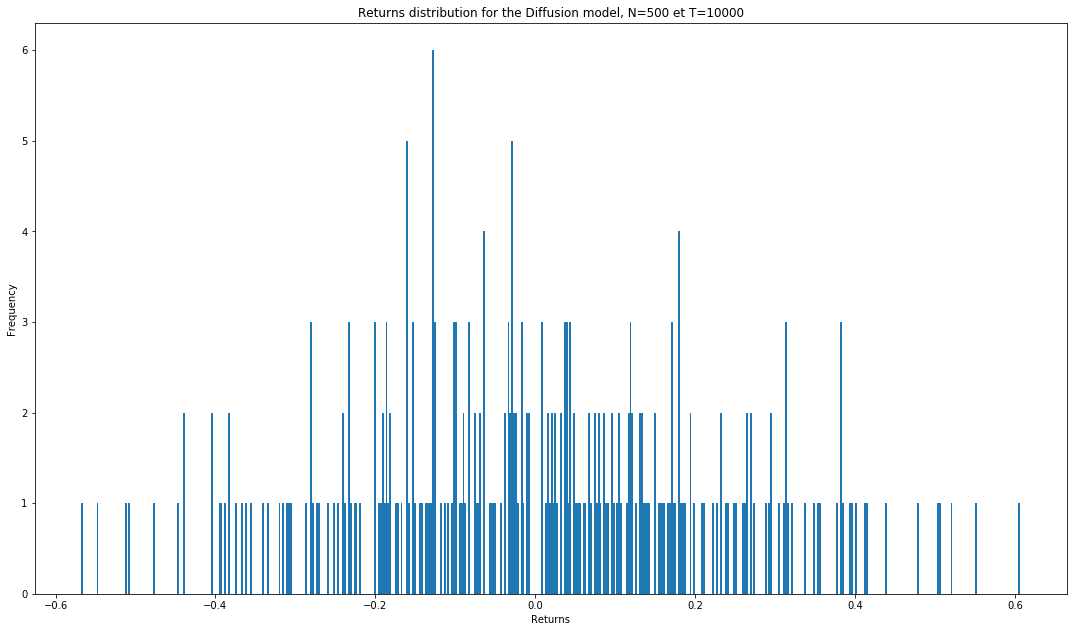

In [11]:
# Plot the returns distribution without zeros
delta_updated = []
for i in range(len(delta_price)):
    if delta_price[i] != 0:
        delta_updated.append(delta_price[i])
print(len(delta_updated))
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5) 
plt.hist(delta_updated, bins = 500)
plt.title("Returns distribution for the Diffusion model, N=%i et T=%i" %(N,T))
plt.ylabel('Frequency')
plt.xlabel('Returns')
plt.show()

In [12]:
# Plot the range values of prices

def create_ranges(series):
    series.pop(0)
    series.pop(1)
    #return prices with different lengths of time chosen
    p_1 = [series]
    p_2 = [series[:T//2],series[T//2:]]
    
    p_4 = []
    for i in range(4):
        p_4.append(series[i*(T//4):(i+1)*(T//4)])
    p_8 = []
    for i in range(8):
        p_8.append(series[i*(T//8):(i+1)*(T//8)])
    p_16 = []
    for i in range(16):
        p_16.append(series[i*(T//16):(i+1)*(T//16)])
    p_32 = []
    for i in range(32):
        p_32.append(series[i*(T//32):(i+1)*(T//32)])
    p_64 = []
    for i in range(64):
        p_64.append(series[i*(T//64):(i+1)*(T//64)])
    p_128 = []
    for i in range(128):
        p_128.append(series[i*(T//128):(i+1)*(T//128)])
    p_256 = []
    for i in range(256):
        p_256.append(series[i*(T//256):(i+1)*(T//256)])
    p_512 = []
    for i in range(512):
        p_512.append(series[i*(T//512):(i+1)*(T//512)])
    p_1024 = []
    for i in range(1024):
        p_1024.append(series[i*(T//1024):(i+1)*(T//1024)])
    p_2048 = []
    for i in range(2048):
        p_2048.append(series[i*(T//2048):(i+1)*(T//2048)])
    p_4096 = []
    for i in range(4096):
        p_4096.append(series[i*(T//4096):(i+1)*(T//4096)])

    return([p_1,p_2,p_4,p_8,p_16,p_32,p_64,p_128,p_256,p_512,p_1024,p_2048,p_4096])

def range_prices(series , m):
    #Prices is a list containing sublists
    #m is the number of subintervals within prices
    
    #This first list allows to store the rescaled ranges for each subinterval before averaging them
    rescaled_ranges = []
    #This list will store the square mean adjusted series
    squared_series=[]
    
    Y_div = []
    Y_div_square = []
    means = []
    for i in range(len(series)):
        #Calculate the prices mean for a subinterval
        moy = np.mean(series[i])
        #Create mean adjusted series for a subinterval
        series[i] = series[i] - moy*np.ones((len(series[i])))
        #Create squared mean adjusted series for a subinterval (to calculate the standard deviation)
        squared_series = (series[i] - moy*np.ones(len(series[i])))**2
        #Create cumulative deviate series 
        Z = []
        for k in range (1,len(series[i])):
            Z.append(sum(series[i][:k]))
        #Compute the range
        R = 0
        if (max(Z) - min(Z)) > 0:
            R = max(Z) - min(Z)
        #Compute the standard deviation
        S = 0
        S = np.sqrt((1/len(series[i]))*sum(squared_series))
        #Adding the rescaled range to the list before averaging
        rescaled_ranges.append(R)
        
    return(np.log(np.mean(rescaled_ranges)))
 
        



def rescaled_ranges(series):
    result = []
    ranges = create_ranges(series)
    for r in range(len(ranges)):
        result.append(range_prices(ranges[r] , r+1))
            
    return(result)


range_values = rescaled_ranges(prices)


Wall time: 15.1 s


C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in log


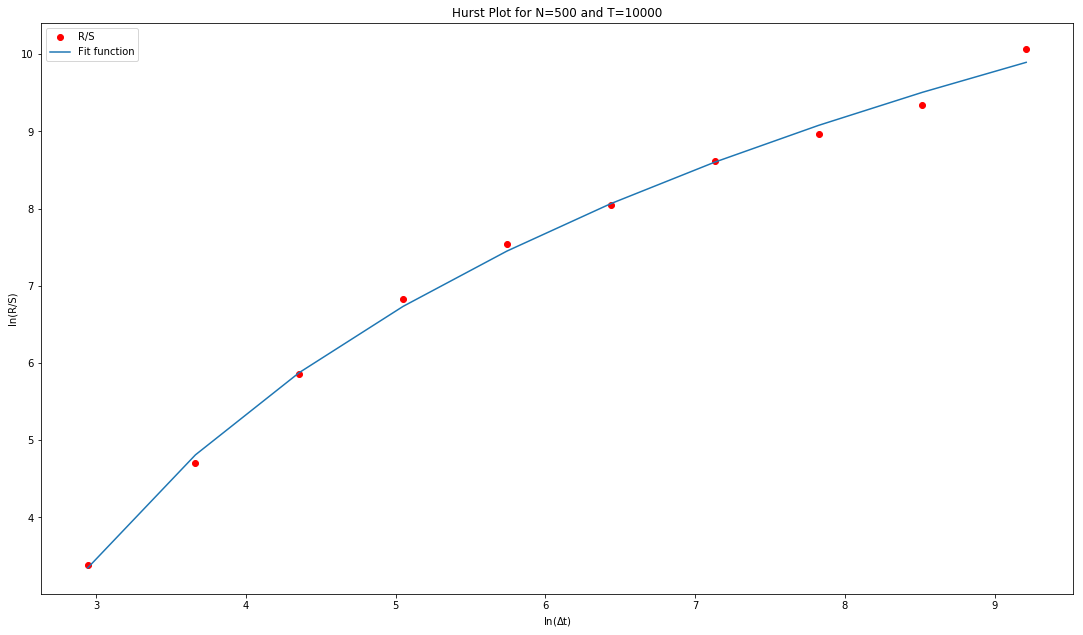

In [16]:
# Plotting the obtained rescaled range and comparing to the theoretical results

def theoretical_hurst(t,H,A,t0):
    return(H*np.log(t)+A*np.log(np.log(t)-np.log(t0)))

def theoretical_derivative(t,H,A,t0):
    return(H+A*(1/(t-np.log(t0))))

ln_t = [math.log((T-2)//(2**t)) for t in range(10)]


popt, pcov = curve_fit(theoretical_hurst, ln_t, range_values[:10], maxfev=10000)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5) 

fit = [theoretical_hurst(t,popt[0],popt[1],popt[2]) for t in ln_t]
theory = [theoretical_hurst(t,1.43,popt[1],popt[2]) for t in ln_t]

plt.plot(ln_t, range_values[:10], "ro", label='R/S')
plt.plot(ln_t,fit[:10], label='Fit function')
plt.ylabel('ln(R/S)')
plt.xlabel('ln($\Delta$t)')
plt.legend()
plt.title("Hurst Plot for N=%i and T=%i" %(N,T))
plt.show()


In [14]:
# Gives the Hurst of the price series
def hurst(ts):
    """Returns the Hurst Exponent of the time series vector ts"""
    # Create the range of lag values
    lags = range(2, 100)

    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]

    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)

    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

# Create a Gometric Brownian Motion, Mean-Reverting and Trending Series
gbm = log(cumsum(randn(100000))+1000)
print(gbm)
mr = log(randn(100000)+1000)
tr = log(cumsum(randn(100000)+1)+1000)

# Output the Hurst Exponent for each of the above series
# and the price of Google (the Adjusted Close price) for 
# the ADF test given above in the article
print("Hurst(GBM):   %s" %(hurst(gbm)))
print("Hurst(MR):    %s" %(hurst(mr)))
print("Hurst(TR):    %s" %(hurst(tr)))

# Assuming you have run the above code to obtain 'goog'!
print("Hurst(Diffusion):  %s" %(hurst(prices)))

[6.90659321 6.90612244 6.90651064 ... 7.35560747 7.35493759 7.3544278 ]
Hurst(GBM):   0.4986501925766181
Hurst(MR):    0.00022992698729606986
Hurst(TR):    0.955781914845145
Hurst(Diffusion):  0.35634133071369506
